### Simulation Study explaining bias variance tradeoff

Based on a study done by Beate Sick done in R

In [1]:
# Some imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

#To make ploting consitent
sns.reset_defaults()
sns.set_context(context='talk',font_scale=0.7)

%matplotlib inline
plt.style.use('default')
np.random.seed(42)
import pandas as pd

((200, 1), (200, 1))

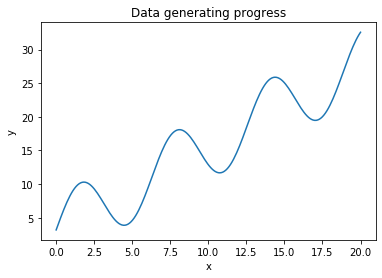

In [2]:
N = 200
x = np.linspace(0,20,num=N).reshape(-1,1)
y = 5*np.sin(x) + 1.24*x+3.2
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data generating progress')
x.shape,y.shape

Text(0.5, 1.0, 'Some training data')

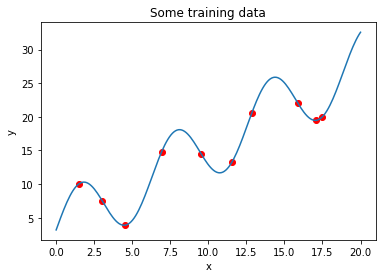

In [3]:
def get_training(n_train=10, eps=0.0):
    idx = np.random.permutation(N)[0:n_train] #10 Random training points
    return x[idx],y[idx,0]+np.random.normal(loc=0,scale=eps,size=n_train) 

xt,yt = get_training()
plt.plot(x,y)
plt.scatter(xt, yt, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Some training data')

### Fitting two models to the data

In [4]:
# Linear model
def get_lin_pred(xt,yt,x):
    model = LinearRegression()
    model.fit(xt, yt) 
    return model.predict(x.reshape(-1,1))

In [5]:
#Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=3)
x_poly_t = polynomial_features.fit_transform(xt)
np.round(x_poly_t[0:3,],2)

array([[  1.  ,   9.55,  91.16, 870.37],
       [  1.  ,   1.51,   2.27,   3.43],
       [  1.  ,   3.02,   9.09,  27.41]])

In [6]:
def get_poly_pred(xt,yt,x):
    polynomial_features= PolynomialFeatures(degree=8)
    x_poly_t = polynomial_features.fit_transform(xt)
    model = LinearRegression()
    model.fit(x_poly_t, yt)
    x_poly = polynomial_features.fit_transform(x)
    return model.predict(x_poly)

(-10, 40)

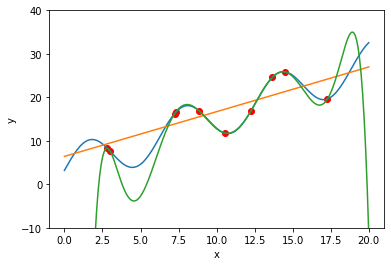

In [7]:
## Let this run a few time
from sklearn.linear_model import LinearRegression

xt,yt = get_training()
y_pred_lin = get_lin_pred(xt,yt,x)
y_pred_poly = get_poly_pred(xt,yt,x)
plt.plot(x,y)
plt.scatter(xt, yt, color='r')
plt.plot(x,y_pred_lin)
plt.plot(x,y_pred_poly)
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-10,40)

Conclusion: 

* Flexible model 
    * goes thru all training points. 
    * Quite different from run to run. 
    * Only good on training point. 
    * Quite disapointing on other (test) data
    * Low Bias, high variance
    
* Simple model
    * Does not fit the training data perfect
    * Less variance from run to run

### Evaluation of the predictions (several runs)

In [8]:
runs   = 100
num_te = 30 #Number of test-points
x_te = np.linspace(0,20,num_te).reshape(-1,1)
y_te_lin = np.zeros((runs,num_te))
y_te_poly = np.zeros((runs,num_te))
for r in range(runs):
    xt,yt = get_training()
    y_te_lin[r] = get_lin_pred(xt,yt,x_te)
    y_te_poly[r] = get_poly_pred(xt,yt,x_te)

(-10, 40)

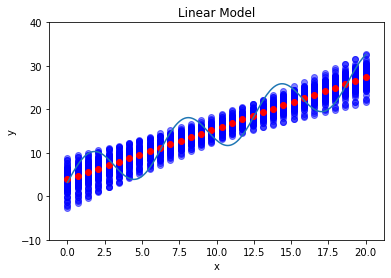

In [9]:
plt.plot(x,y)
#plt.scatter(x_te,np.mean(y_te_lin,axis=0))
for i in range(runs):
    plt.scatter(x_te,y_te_lin[i], color='b', alpha=0.5)
plt.scatter(x_te,np.average(y_te_lin,axis=0), color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Model')
plt.ylim(-10,40)

(-10, 40)

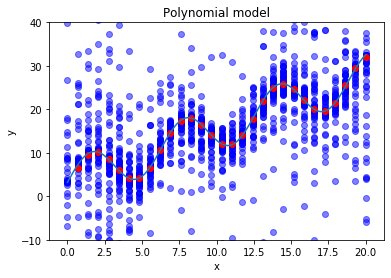

In [10]:
plt.plot(x,y)
#plt.scatter(x_te,np.mean(y_te_lin,axis=0))
for i in range(runs):
    plt.scatter(x_te,y_te_poly[i], color='b', alpha=0.5)
#plt.scatter(x_te,np.average(y_te_poly,axis=0), color='r')
plt.scatter(x_te,np.median(y_te_poly,axis=0), color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial model')
plt.ylim(-10,40)